# Tournament Analysis 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

## Parse runs based on config categories

In [3]:
df = pd.read_csv('results.csv')

df

,T,player,seed,map_path,run_path,score,sec,returncode
0,2016,1,10000,tournament/maps/species=4_animals=4x2_helpers=...,tournament/runs/T=2016#player=1#seed=10000#map...,-1,-1.000,1
1,2016,2,10000,tournament/maps/species=4_animals=4x2_helpers=...,tournament/runs/T=2016#player=2#seed=10000#map...,0,4.398,0
2,2016,3,10000,tournament/maps/species=4_animals=4x2_helpers=...,tournament/runs/T=2016#player=3#seed=10000#map...,0,4.390,0
3,2016,4,10000,tournament/maps/species=4_animals=4x2_helpers=...,tournament/runs/T=2016#player=4#seed=10000#map...,0,4.364,0
4,2016,5,10000,tournament/maps/species=4_animals=4x2_helpers=...,tournament/runs/T=2016#player=5#seed=10000#map...,0,4.465,0
...,...,...,...,...,...,...,...,...
7195,7056,6,40059,tournament/maps/species=100_animals=25x2_25x6_...,tournament/runs/T=7056#player=6#seed=40059#map...,4824,163.400,0
7196,7056,7,40059,tournament/maps/species=100_animals=25x2_25x6_...,tournament/runs/T=7056#player=7#seed=40059#map...,6919,219.100,0
7197,7056,8,40059,tournament/maps/species=100_animals=25x2_25x6_...,tournament/runs/T=7056#player=8#seed=40059#map...,7916,238.700,0
7198,7056,9,40059,tournament/maps/species=100_animals=25x2_25x6_...,tournament/runs/T=7056#player=9#seed=40059#map...,0,161.700,0


In [20]:
df["species"] = None
df["animals"] = None
df["helpers"] = None
df["ark"] = None

df

,T,player,seed,map_path,run_path,score,sec,returncode,species,animals,helpers,ark
0,2016,1,10000,tournament/maps/species=4_animals=4x2_helpers=...,tournament/runs/T=2016#player=1#seed=10000#map...,-1,-1.000,1,None,None,None,None
1,2016,2,10000,tournament/maps/species=4_animals=4x2_helpers=...,tournament/runs/T=2016#player=2#seed=10000#map...,0,4.398,0,None,None,None,None
2,2016,3,10000,tournament/maps/species=4_animals=4x2_helpers=...,tournament/runs/T=2016#player=3#seed=10000#map...,0,4.390,0,None,None,None,None
3,2016,4,10000,tournament/maps/species=4_animals=4x2_helpers=...,tournament/runs/T=2016#player=4#seed=10000#map...,0,4.364,0,None,None,None,None
4,2016,5,10000,tournament/maps/species=4_animals=4x2_helpers=...,tournament/runs/T=2016#player=5#seed=10000#map...,0,4.465,0,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...
7195,7056,6,40059,tournament/maps/species=100_animals=25x2_25x6_...,tournament/runs/T=7056#player=6#seed=40059#map...,4824,163.400,0,None,None,None,None
7196,7056,7,40059,tournament/maps/species=100_animals=25x2_25x6_...,tournament/runs/T=7056#player=7#seed=40059#map...,6919,219.100,0,None,None,None,None
7197,7056,8,40059,tournament/maps/species=100_animals=25x2_25x6_...,tournament/runs/T=7056#player=8#seed=40059#map...,7916,238.700,0,None,None,None,None
7198,7056,9,40059,tournament/maps/species=100_animals=25x2_25x6_...,tournament/runs/T=7056#player=9#seed=40059#map...,0,161.700,0,None,None,None,None


In [21]:
import os

for i, row in df.iterrows():
    map_path = os.path.basename(row['map_path'])
    substrings = map_path.split('.json')[0].split('_')
    print(substrings)
    if len(substrings) > 4:
        first_animal = substrings[1].split('=')[1]
        animals = '_'.join([first_animal] + substrings[2:-2])
    df.at[i, 'species'] = int(substrings[0].split('=')[1])
    df.at[i, 'animals'] = substrings[1].split('=')[1] if len(substrings) == 4 else animals
    df.at[i, 'helpers'] = int(substrings[-2].split('=')[1])
    df.at[i, 'ark'] = substrings[-1].split('=')[1]

['species=4', 'animals=4x2', 'helpers=2', 'ark=500x500']
['species=4', 'animals=4x2', 'helpers=2', 'ark=500x500']
['species=4', 'animals=4x2', 'helpers=2', 'ark=500x500']
['species=4', 'animals=4x2', 'helpers=2', 'ark=500x500']
['species=4', 'animals=4x2', 'helpers=2', 'ark=500x500']
['species=4', 'animals=4x2', 'helpers=2', 'ark=500x500']
['species=4', 'animals=4x2', 'helpers=2', 'ark=500x500']
['species=4', 'animals=4x2', 'helpers=2', 'ark=500x500']
['species=4', 'animals=4x2', 'helpers=2', 'ark=500x500']
['species=4', 'animals=4x2', 'helpers=2', 'ark=500x500']
['species=4', 'animals=4x2', 'helpers=2', 'ark=500x500']
['species=4', 'animals=4x2', 'helpers=2', 'ark=500x500']
['species=4', 'animals=4x2', 'helpers=2', 'ark=500x500']
['species=4', 'animals=4x2', 'helpers=2', 'ark=500x500']
['species=4', 'animals=4x2', 'helpers=2', 'ark=500x500']
['species=4', 'animals=4x2', 'helpers=2', 'ark=500x500']
['species=4', 'animals=4x2', 'helpers=2', 'ark=500x500']
['species=4', 'animals=4x2', 'h

In [130]:
df.to_csv('results_parsed.csv', index=False)

df

,T,player,seed,map_path,run_path,score,sec,returncode,species,animals,helpers,ark,animals_cat,ark_cat
0,2016,1,10000,tournament/maps/species=4_animals=4x2_helpers=...,tournament/runs/T=2016#player=1#seed=10000#map...,-1,-1.000,1,4,4x2,2,500x500,unicorn,center
1,2016,2,10000,tournament/maps/species=4_animals=4x2_helpers=...,tournament/runs/T=2016#player=2#seed=10000#map...,0,4.398,0,4,4x2,2,500x500,unicorn,center
2,2016,3,10000,tournament/maps/species=4_animals=4x2_helpers=...,tournament/runs/T=2016#player=3#seed=10000#map...,0,4.390,0,4,4x2,2,500x500,unicorn,center
3,2016,4,10000,tournament/maps/species=4_animals=4x2_helpers=...,tournament/runs/T=2016#player=4#seed=10000#map...,0,4.364,0,4,4x2,2,500x500,unicorn,center
4,2016,5,10000,tournament/maps/species=4_animals=4x2_helpers=...,tournament/runs/T=2016#player=5#seed=10000#map...,0,4.465,0,4,4x2,2,500x500,unicorn,center
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7195,7056,6,40059,tournament/maps/species=100_animals=25x2_25x6_...,tournament/runs/T=7056#player=6#seed=40059#map...,4824,163.400,0,100,25x2_25x6_25x20_25x100,60,990x990,mixed,corner
7196,7056,7,40059,tournament/maps/species=100_animals=25x2_25x6_...,tournament/runs/T=7056#player=7#seed=40059#map...,6919,219.100,0,100,25x2_25x6_25x20_25x100,60,990x990,mixed,corner
7197,7056,8,40059,tournament/maps/species=100_animals=25x2_25x6_...,tournament/runs/T=7056#player=8#seed=40059#map...,7916,238.700,0,100,25x2_25x6_25x20_25x100,60,990x990,mixed,corner
7198,7056,9,40059,tournament/maps/species=100_animals=25x2_25x6_...,tournament/runs/T=7056#player=9#seed=40059#map...,0,161.700,0,100,25x2_25x6_25x20_25x100,60,990x990,mixed,corner


In [43]:
print(f"Species: {df['species'].unique()}")
print(f"Animals: {df['animals'].unique()}")
print(f"Helpers: {df['helpers'].unique()}")
print(f"Ark: {df['ark'].unique()}")
print(f"T: {df['T'].unique()}")

Species: [4 16 32 100]
Animals: ['4x2' '4x6' '4x20' '4x100' '1x2_1x6_1x20_1x100' '16x2' '16x6' '16x20'
 '16x100' '4x2_4x6_4x20_4x100' '32x2' '32x6' '32x20' '32x100'
 '8x2_8x6_8x20_8x100' '100x2' '100x6' '100x20' '100x100'
 '25x2_25x6_25x20_25x100']
Helpers: [2 9 25 60]
Ark: ['500x500' '100x400' '990x990']
T: [2016 4032 7056]


#### Animal categories
* All unicorn
* All rare
* All intermediate
* All common
* 4 species (1 each)
* 16 species (1 each)
* 32 species (1 each)
* 100 species (1 each)

In [33]:
df["animals_cat"] = None

for i, row in df.iterrows():
    animals = row['animals']
    substrings = animals.split('x')
    # print(substrings)
    if len(substrings) > 2:
        df.at[i, 'animals_cat'] = 'mixed'
    else:
        count = int(substrings[0])
        if count == 4:
            df.at[i, 'animals_cat'] = 'unicorn'
        elif count == 16:
            df.at[i, 'animals_cat'] = 'rare'
        elif count == 32:
            df.at[i, 'animals_cat'] = 'intermediate'
        elif count == 100:
            df.at[i, 'animals_cat'] = 'common'
        else:
            print(f"Unknown animal category: {animals}, {substrings}, {count}")

In [36]:
df

,T,player,seed,map_path,run_path,score,sec,returncode,species,animals,helpers,ark,animals_cat
0,2016,1,10000,tournament/maps/species=4_animals=4x2_helpers=...,tournament/runs/T=2016#player=1#seed=10000#map...,-1,-1.000,1,4,4x2,2,500x500,unicorn
1,2016,2,10000,tournament/maps/species=4_animals=4x2_helpers=...,tournament/runs/T=2016#player=2#seed=10000#map...,0,4.398,0,4,4x2,2,500x500,unicorn
2,2016,3,10000,tournament/maps/species=4_animals=4x2_helpers=...,tournament/runs/T=2016#player=3#seed=10000#map...,0,4.390,0,4,4x2,2,500x500,unicorn
3,2016,4,10000,tournament/maps/species=4_animals=4x2_helpers=...,tournament/runs/T=2016#player=4#seed=10000#map...,0,4.364,0,4,4x2,2,500x500,unicorn
4,2016,5,10000,tournament/maps/species=4_animals=4x2_helpers=...,tournament/runs/T=2016#player=5#seed=10000#map...,0,4.465,0,4,4x2,2,500x500,unicorn
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7195,7056,6,40059,tournament/maps/species=100_animals=25x2_25x6_...,tournament/runs/T=7056#player=6#seed=40059#map...,4824,163.400,0,100,25x2_25x6_25x20_25x100,60,990x990,mixed
7196,7056,7,40059,tournament/maps/species=100_animals=25x2_25x6_...,tournament/runs/T=7056#player=7#seed=40059#map...,6919,219.100,0,100,25x2_25x6_25x20_25x100,60,990x990,mixed
7197,7056,8,40059,tournament/maps/species=100_animals=25x2_25x6_...,tournament/runs/T=7056#player=8#seed=40059#map...,7916,238.700,0,100,25x2_25x6_25x20_25x100,60,990x990,mixed
7198,7056,9,40059,tournament/maps/species=100_animals=25x2_25x6_...,tournament/runs/T=7056#player=9#seed=40059#map...,0,161.700,0,100,25x2_25x6_25x20_25x100,60,990x990,mixed


In [128]:
df['ark_cat'] = None

for i, row in df.iterrows():
    ark = row['ark']
    if ark == '500x500':
        df.at[i, 'ark_cat'] = 'center'
    elif ark == '990x990':
        df.at[i, 'ark_cat'] = 'corner'
    else:
         df.at[i, 'ark_cat'] = 'off-center'

In [129]:
df

,T,player,seed,map_path,run_path,score,sec,returncode,species,animals,helpers,ark,animals_cat,ark_cat
0,2016,1,10000,tournament/maps/species=4_animals=4x2_helpers=...,tournament/runs/T=2016#player=1#seed=10000#map...,-1,-1.000,1,4,4x2,2,500x500,unicorn,center
1,2016,2,10000,tournament/maps/species=4_animals=4x2_helpers=...,tournament/runs/T=2016#player=2#seed=10000#map...,0,4.398,0,4,4x2,2,500x500,unicorn,center
2,2016,3,10000,tournament/maps/species=4_animals=4x2_helpers=...,tournament/runs/T=2016#player=3#seed=10000#map...,0,4.390,0,4,4x2,2,500x500,unicorn,center
3,2016,4,10000,tournament/maps/species=4_animals=4x2_helpers=...,tournament/runs/T=2016#player=4#seed=10000#map...,0,4.364,0,4,4x2,2,500x500,unicorn,center
4,2016,5,10000,tournament/maps/species=4_animals=4x2_helpers=...,tournament/runs/T=2016#player=5#seed=10000#map...,0,4.465,0,4,4x2,2,500x500,unicorn,center
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7195,7056,6,40059,tournament/maps/species=100_animals=25x2_25x6_...,tournament/runs/T=7056#player=6#seed=40059#map...,4824,163.400,0,100,25x2_25x6_25x20_25x100,60,990x990,mixed,corner
7196,7056,7,40059,tournament/maps/species=100_animals=25x2_25x6_...,tournament/runs/T=7056#player=7#seed=40059#map...,6919,219.100,0,100,25x2_25x6_25x20_25x100,60,990x990,mixed,corner
7197,7056,8,40059,tournament/maps/species=100_animals=25x2_25x6_...,tournament/runs/T=7056#player=8#seed=40059#map...,7916,238.700,0,100,25x2_25x6_25x20_25x100,60,990x990,mixed,corner
7198,7056,9,40059,tournament/maps/species=100_animals=25x2_25x6_...,tournament/runs/T=7056#player=9#seed=40059#map...,0,161.700,0,100,25x2_25x6_25x20_25x100,60,990x990,mixed,corner


In [144]:
df[df['ark_cat'] == 'off-center']['ark'].unique()

array(['100x400'], dtype=object)

In [126]:
df.columns

Index(['T', 'player', 'seed', 'map_path', 'run_path', 'score', 'sec',
       'returncode', 'species', 'animals', 'helpers', 'ark', 'animals_cat',
       'ark_cat'],
      dtype='object')

In [ ]:
df_player = df[df['player'] == 5]
df_player

#### Plot ideas

* Which group has highest score most often bar chart throughout 4 categories?
* Boxlpot of scores throughout 4 categories
* Could differentiate the mixed category based on how many species again
* Ark position vs score
* helpers vs score
* Species vs score
* T vs score
* Optional: runtime

----
* On which configs does every player do badly?
* On which configs does every player do well?

---- 
* On which configs does our player do well that showcases its strengths?

## Plot wins per animal category

In [66]:
df_failed = df[df['returncode'] != 0]
df_failed.player.value_counts()

player
1    180
9      1
Name: count, dtype: int64

In [63]:
sub = df[df['animals_cat'] == 'common']

# group by T (or anything representing a single contest)
sub.groupby(['T', 'map_path', 'player'])[['score']].min()
   

score
T    map_path                                           player       
2016 tournament/maps/species=100_animals=100x100_hel... 1        9802
                                                        2        9703
                                                        3        8118
                                                        4        7820
                                                        5        8416
...                                                               ...
7056 tournament/maps/species=100_animals=100x6_helpe... 6         627
                                                        7        1051
                                                        8        2152
                                                        9        1451
                                                        10       2058

[1440 rows x 1 columns]

['common', 'intermediate', 'mixed', 'rare', 'unicorn']


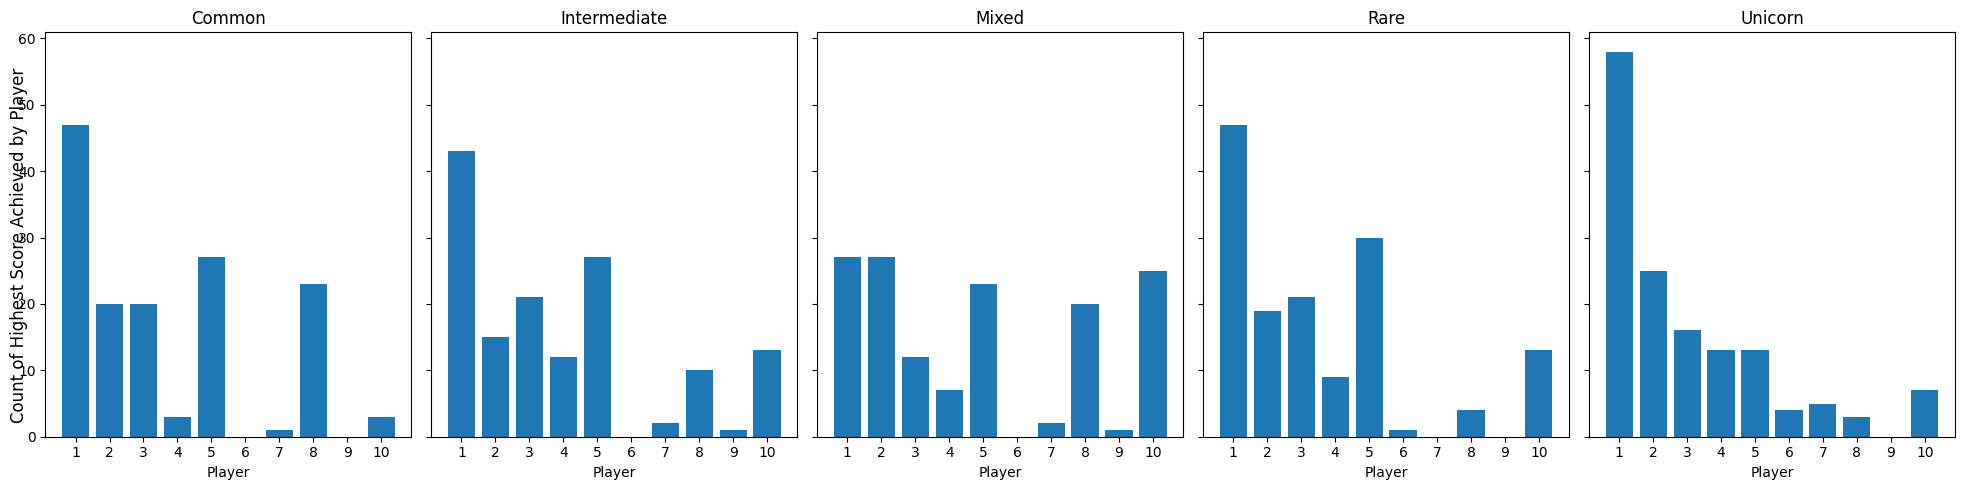

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# assume df is already loaded

fig, axes = plt.subplots(1, 5, figsize=(20, 5), sharey=True)

animals_categories = df['animals_cat'].unique()
animals_categories = sorted(animals_categories) 
print(animals_categories)

for ax, cat in zip(axes, animals_categories):
    sub = df[df['animals_cat'] == cat]

    # group by T (or anything representing a single contest)
    # find player with highest score in each group
    winners = (
        sub.loc[sub.groupby(['T', 'map_path'])['score'].idxmax()]['player']
        .value_counts()
        .sort_index()
    )

    ax.bar(winners.index, winners.values)
    ax.set_title(f"{cat.title()}")
    ax.set_xlabel("Player")
    ax.set_xticks(range(1, 11))  # players 1–10

fig.supylabel("Count of Highest Score Achieved by Player")
plt.tight_layout()
plt.show()

## Boxplot by animal category single and mixed

/var/folders/6f/jf84pgs92_g7qw0w6040htqc0000gn/T/ipykernel_43007/4146254991.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = [cm.get_cmap('tab10')(i / 9) for i in range(10)] + \
/var/folders/6f/jf84pgs92_g7qw0w6040htqc0000gn/T/ipykernel_43007/4146254991.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  [cm.get_cmap('tab20')(1 / 19)]


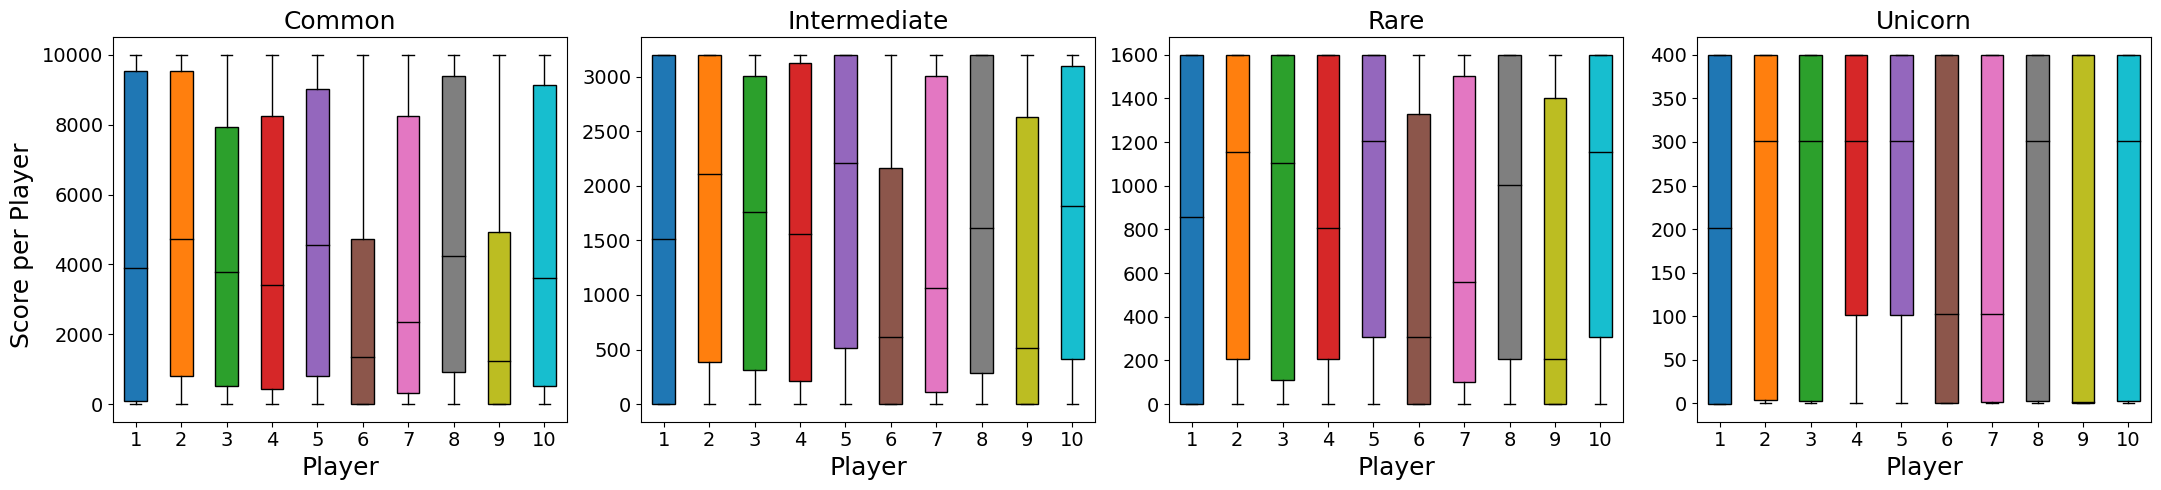

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm

# your colors
colors = [cm.get_cmap('tab10')(i / 9) for i in range(10)] + \
         [cm.get_cmap('tab20')(1 / 19)]

fig, axes = plt.subplots(1, 4, figsize=(22, 5))

animals_categories = sorted(df['animals_cat'].unique())
animals_categories.remove('mixed')  # exclude mixed category

for ax, cat in zip(axes, animals_categories):
    sub = df[df['animals_cat'] == cat]

    # collect scores per player
    data = [sub[sub['player'] == p]['score'].values for p in range(1, 11)]

    # boxplot with black median line
    bp = ax.boxplot(
        data,
        positions=range(1, 11),
        patch_artist=True,
        medianprops=dict(color="black")
    )

    # apply colors to boxes
    for patch, color in zip(bp['boxes'], colors[:10]):
        patch.set_facecolor(color)

    ax.set_title(cat.title(), fontsize=18)
    ax.set_xlabel("Player", fontsize=18)
    ax.set_xticks(range(1, 11))
    ax.tick_params(axis='x', labelsize=14)
    ax.tick_params(axis='y', labelsize=14)

fig.supylabel("Score per Player", fontsize=18)
fig.tight_layout(rect=(0.01, 0, 1, 1))
plt.savefig('players_score_single_cat.pdf')
plt.show()

/var/folders/6f/jf84pgs92_g7qw0w6040htqc0000gn/T/ipykernel_43007/2935419113.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = [cm.get_cmap('tab10')(i / 9) for i in range(10)] + \
/var/folders/6f/jf84pgs92_g7qw0w6040htqc0000gn/T/ipykernel_43007/2935419113.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  [cm.get_cmap('tab20')(1 / 19)]


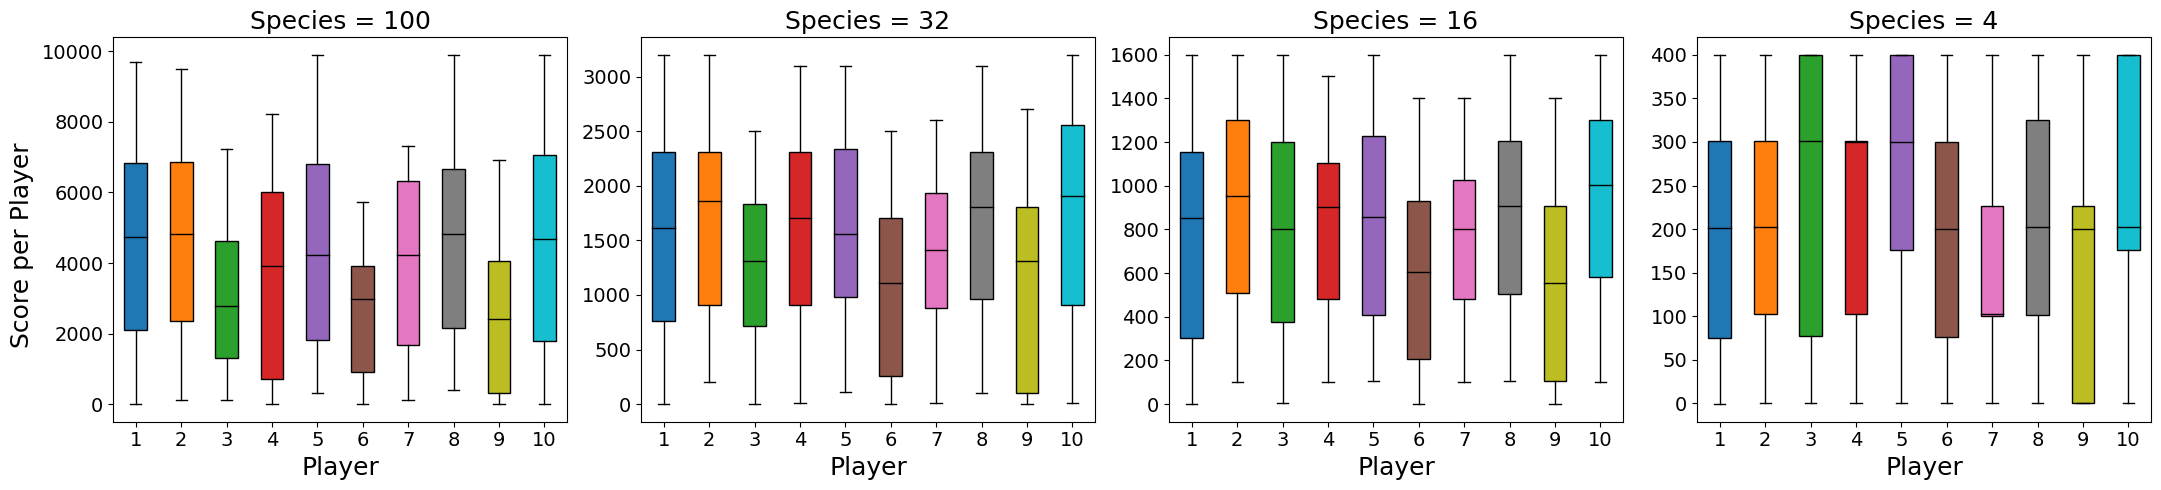

In [96]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm

# your colors
colors = [cm.get_cmap('tab10')(i / 9) for i in range(10)] + \
         [cm.get_cmap('tab20')(1 / 19)]

# filter only mixed category
df_mixed = df[df['animals_cat'] == 'mixed']

# unique species values (should be 4)
species_values = sorted(df_mixed['species'].unique(), reverse=True)

fig, axes = plt.subplots(1, 4, figsize=(22, 5))

for ax, sp in zip(axes, species_values):
    sub = df_mixed[df_mixed['species'] == sp]

    # collect scores per player
    data = [sub[sub['player'] == p]['score'].values for p in range(1, 11)]

    bp = ax.boxplot(
        data,
        positions=range(1, 11),
        patch_artist=True,
        medianprops=dict(color="black")  # black median line
    )

    # color each player's box
    for patch, color in zip(bp['boxes'], colors[:10]):
        patch.set_facecolor(color)

    ax.set_title(f"Species = {sp}", fontsize=18)
    ax.set_xlabel("Player", fontsize=18)
    ax.set_xticks(range(1, 11))
    ax.tick_params(axis='x', labelsize=14)
    ax.tick_params(axis='y', labelsize=14)

fig.supylabel("Score per Player", fontsize=18)
fig.tight_layout(rect=(0.01, 0, 1, 1))

plt.savefig('players_score_mixed_cat.pdf')
plt.show()

## Boxplot by number of helpers

group by animal category or species

/var/folders/6f/jf84pgs92_g7qw0w6040htqc0000gn/T/ipykernel_43007/2982507781.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = [cm.get_cmap('tab10')(i / 9) for i in range(10)]


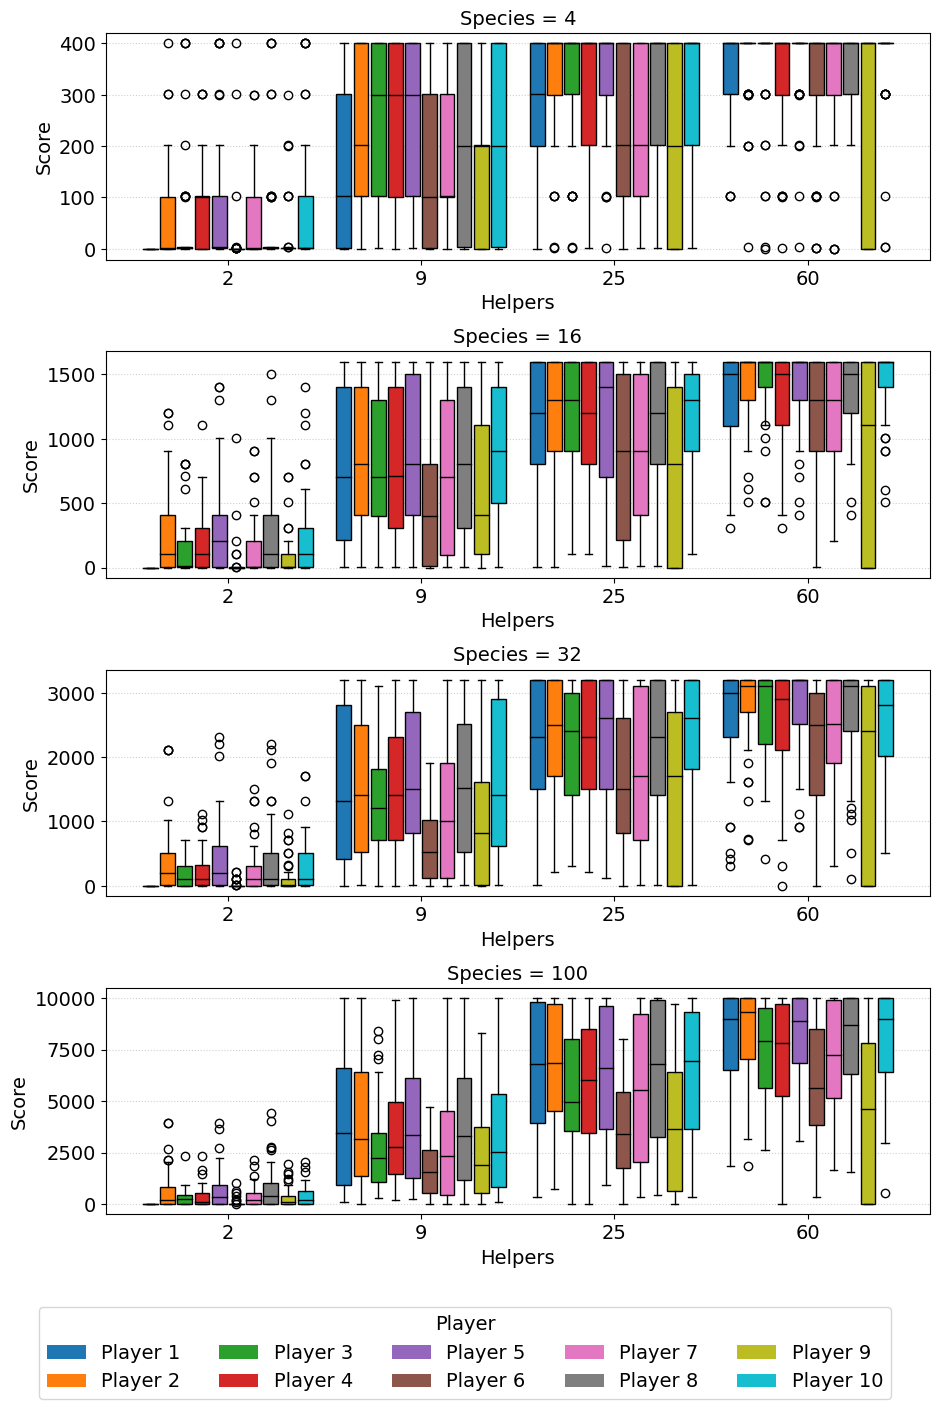

In [203]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.patches import Patch

df_plot = df.copy()

# --- Color palette for 10 players ---
colors = [cm.get_cmap('tab10')(i / 9) for i in range(10)]

# --- Species (4 subplots) ---
species_values = sorted(df_plot['species'].unique())   # [4,16,32,100] expected

# --- Helpers on X axis (4 ticks) ---
helpers_values = sorted(df_plot['helpers'].unique())

# X positions for helper ticks
x_centers = np.arange(1, len(helpers_values) + 1)

# Parameters for multi-player cluster boxplots
n_players = 10
cluster_width = 0.8
box_width = cluster_width / (n_players * 1.05)
offsets = np.linspace(-cluster_width/2, cluster_width/2, n_players)

fig, axes = plt.subplots(len(species_values), 1, figsize=(10, 14), sharey=False)

for ax, sp in zip(axes, species_values):

    sub_sp = df_plot[df_plot['species'] == sp]

    all_data = []
    positions = []

    # build clusters: for each helper value, 10 boxplots (one per player)
    for xi, h in zip(x_centers, helpers_values):
        sub_h = sub_sp[sub_sp['helpers'] == h]

        for p in range(1, n_players + 1):
            scores = sub_h[sub_h['player'] == p]['score'].values
            all_data.append(scores)
            positions.append(xi + offsets[p - 1])

    # Draw boxplot cluster
    bp = ax.boxplot(
        all_data,
        positions=positions,
        widths=box_width,
        patch_artist=True,
        medianprops=dict(color="black"),
        manage_ticks=False
    )

    # Color each box by player
    for i, patch in enumerate(bp['boxes']):
        player_idx = i % n_players
        patch.set_facecolor(colors[player_idx])

    # Style whiskers & caps
    for w in bp['whiskers']:
        w.set_color("black")
    for c in bp['caps']:
        c.set_color("black")

    ax.set_title(f"Species = {sp}", fontsize=14)
    ax.set_xlabel("Helpers", fontsize=14)
    ax.set_ylabel("Score", fontsize=14)

    ax.set_xticks(x_centers)
    ax.set_xticklabels([str(h) for h in helpers_values], fontsize=14)
    ax.tick_params(axis='y', labelsize=14)

    ax.yaxis.grid(True, linestyle=":", alpha=0.6)

# --- Legend at the bottom (horizontal) ---
legend_handles = [
    Patch(facecolor=colors[p], label=f"Player {p+1}") 
    for p in range(n_players)
]

fig.legend(
    handles=legend_handles,
    title="Player",
    loc="lower center",
    bbox_to_anchor=(0.52, -0.01),
    ncol=5,
    fontsize=14,
    title_fontsize=14
)

# layout with room for bottom legend
fig.tight_layout(rect=(0.05, 0.08, 1, 1))
fig.savefig('players_score_by_species_and_helpers.pdf', bbox_inches='tight')
plt.show()


/var/folders/6f/jf84pgs92_g7qw0w6040htqc0000gn/T/ipykernel_43007/1838263884.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = [cm.get_cmap('tab10')(i / 9) for i in range(10)]


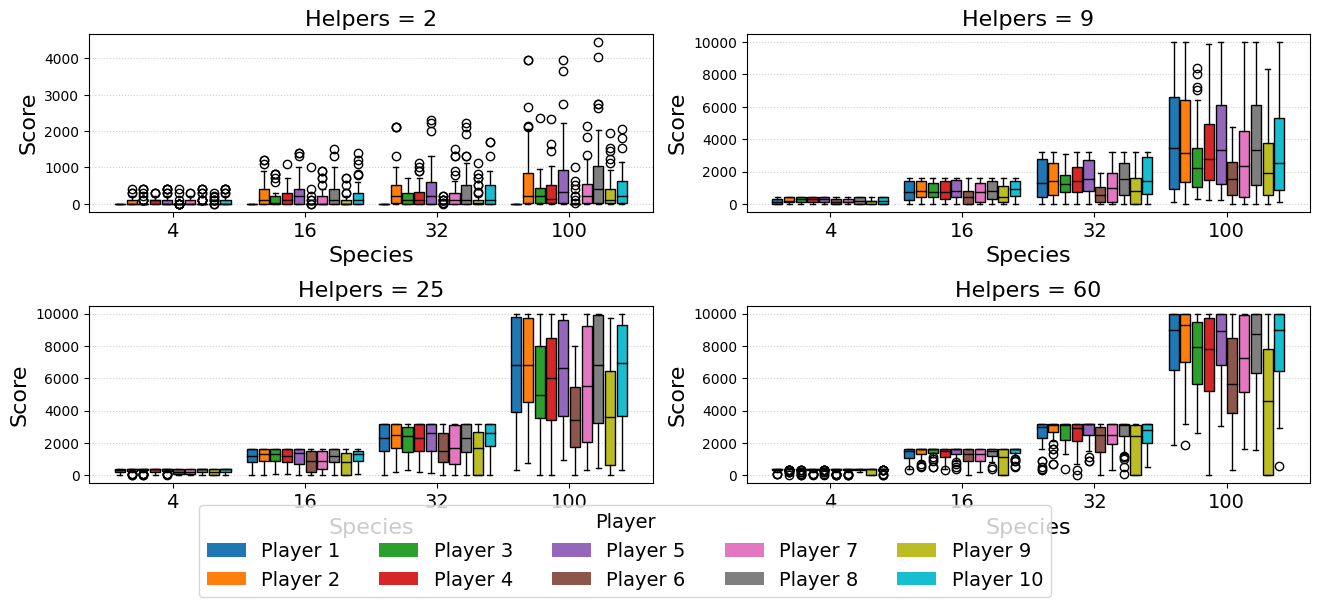

In [169]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.patches import Patch

df_plot = df.copy()

# --- Color palette for 10 players ---
colors = [cm.get_cmap('tab10')(i / 9) for i in range(10)]

# --- Helpers values → subplots ---
helpers_values = sorted(df_plot['helpers'].unique())  # [2,9,25,60]

# --- Species → x-axis ticks ---
species_values = sorted(df_plot['species'].unique())  # [4,16,32,100]

# X positions for species ticks
x_centers = np.arange(1, len(species_values) + 1)

# Parameters for cluster of boxplots per x-tick
n_players = 10
cluster_width = 0.8
box_width = cluster_width / (n_players * 1.05)
offsets = np.linspace(-cluster_width/2, cluster_width/2, n_players)

fig, axes = plt.subplots(2, 2, figsize=(14, 6), sharey=False)
axes = axes.flatten()

for ax, h in zip(axes, helpers_values):

    sub_h = df_plot[df_plot['helpers'] == h]

    all_data = []
    positions = []

    # Build clusters: for each species, 10 boxplots (players 1–10)
    for xi, sp in zip(x_centers, species_values):
        sub_sp = sub_h[sub_h['species'] == sp]

        for p in range(1, n_players + 1):
            scores = sub_sp[sub_sp['player'] == p]['score'].values
            all_data.append(scores)
            positions.append(xi + offsets[p-1])

    # Draw boxplots
    bp = ax.boxplot(
        all_data,
        positions=positions,
        widths=box_width,
        patch_artist=True,
        medianprops=dict(color="black"),
        manage_ticks=False
    )

    # Color each box by player
    for i, patch in enumerate(bp['boxes']):
        player_idx = i % n_players
        patch.set_facecolor(colors[player_idx])

    # Whiskers and caps styling
    for w in bp['whiskers']:
        w.set_color("black")
    for c in bp['caps']:
        c.set_color("black")

    ax.set_title(f"Helpers = {h}", fontsize=16)
    ax.set_xlabel("Species", fontsize=16)
    ax.set_ylabel("Score", fontsize=16)

    ax.set_xticks(x_centers)
    ax.set_xticklabels([str(sp) for sp in species_values], fontsize=14)

    ax.yaxis.grid(True, linestyle=":", alpha=0.6)

# --- Legend at bottom ---
legend_handles = [
    Patch(facecolor=colors[p], label=f"Player {p+1}")
    for p in range(n_players)
]

fig.legend(
    handles=legend_handles,
    title="Player",
    loc="lower center",
    bbox_to_anchor=(0.5, -0.02),
    ncol=5,
    fontsize=14,
    title_fontsize=14
)

# Adjust layout for bottom legend
fig.tight_layout(rect=(0.05, 0.07, 1, 1))

plt.show()


/var/folders/6f/jf84pgs92_g7qw0w6040htqc0000gn/T/ipykernel_43007/3424516267.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = [cm.get_cmap('tab10')(i / 9) for i in range(10)]


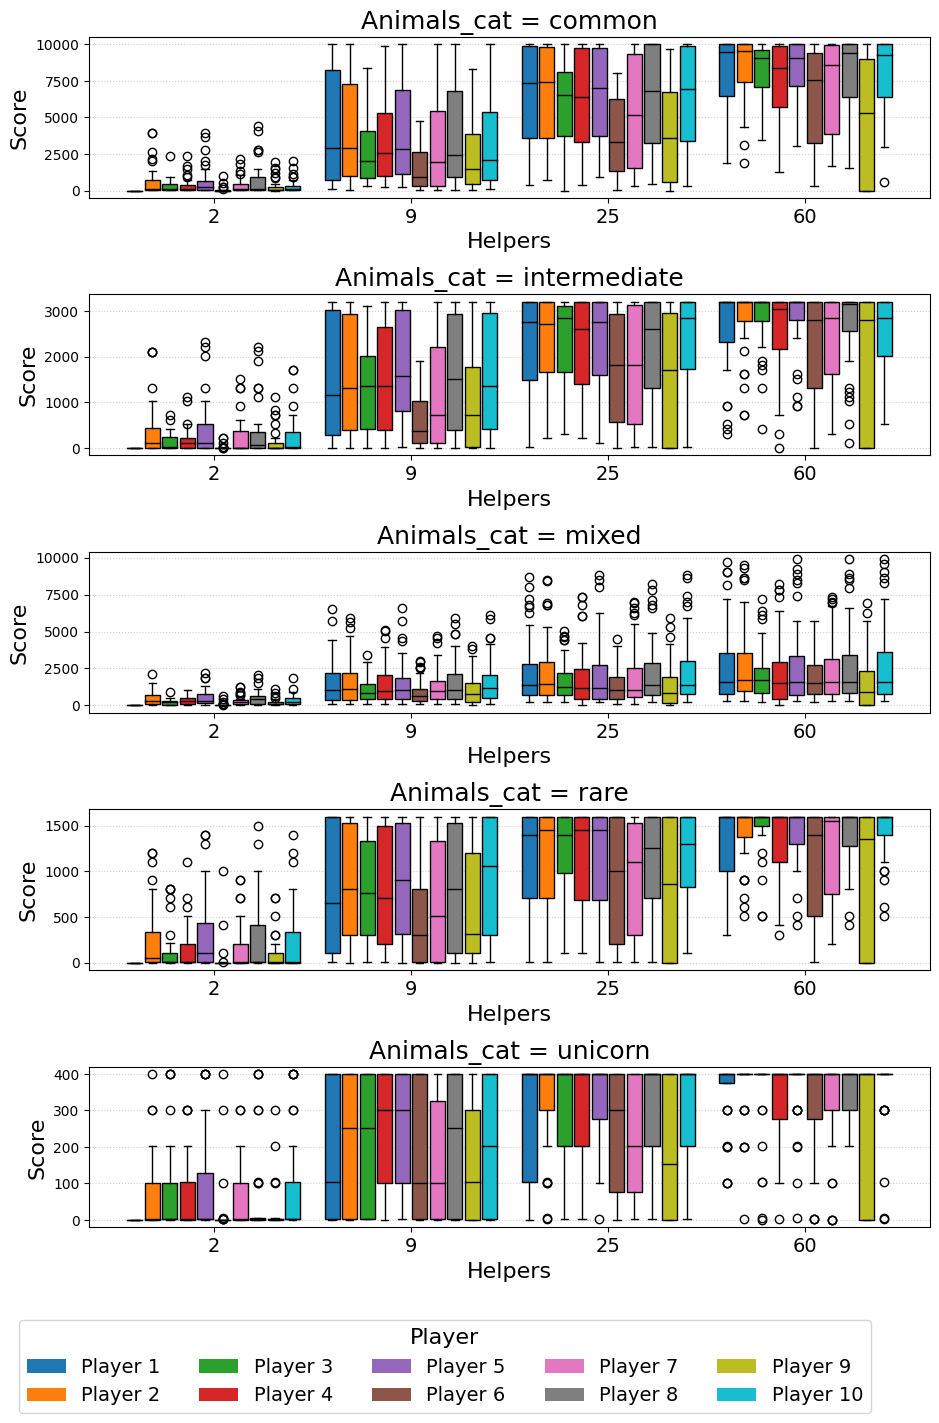

In [160]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.patches import Patch

df_plot = df.copy()

# --- Color palette for 10 players ---
colors = [cm.get_cmap('tab10')(i / 9) for i in range(10)]

# --- Animals_cat groups (4 subplots) ---
animals_values = sorted(df_plot['animals_cat'].unique())  # e.g. ['cat1', 'cat2', 'cat3', 'cat4']

# --- Helpers on X axis (4 ticks) ---
helpers_values = sorted(df_plot['helpers'].unique())

# X positions for helper ticks
x_centers = np.arange(1, len(helpers_values) + 1)

# Parameters for multi-player cluster boxplots
n_players = 10
cluster_width = 0.8
box_width = cluster_width / (n_players * 1.05)
offsets = np.linspace(-cluster_width/2, cluster_width/2, n_players)

fig, axes = plt.subplots(len(animals_values), 1, figsize=(10, 14), sharey=False)

for ax, cat in zip(axes, animals_values):

    sub_cat = df_plot[df_plot['animals_cat'] == cat]

    all_data = []
    positions = []

    # build clusters: for each helper value, 10 boxplots (one per player)
    for xi, h in zip(x_centers, helpers_values):
        sub_h = sub_cat[sub_cat['helpers'] == h]

        for p in range(1, n_players + 1):
            scores = sub_h[sub_h['player'] == p]['score'].values
            all_data.append(scores)
            positions.append(xi + offsets[p - 1])

    # Draw boxplot cluster
    bp = ax.boxplot(
        all_data,
        positions=positions,
        widths=box_width,
        patch_artist=True,
        medianprops=dict(color="black"),
        manage_ticks=False
    )

    # Color each box by player
    for i, patch in enumerate(bp['boxes']):
        player_idx = i % n_players
        patch.set_facecolor(colors[player_idx])

    # Style whiskers & caps
    for w in bp['whiskers']:
        w.set_color("black")
    for c in bp['caps']:
        c.set_color("black")

    ax.set_title(f"Animals_cat = {cat}", fontsize=18)
    ax.set_xlabel("Helpers", fontsize=16)
    ax.set_ylabel("Score", fontsize=16)

    ax.set_xticks(x_centers)
    ax.set_xticklabels([str(h) for h in helpers_values], fontsize=14)

    ax.yaxis.grid(True, linestyle=":", alpha=0.6)

# --- Legend at the bottom (horizontal) ---
legend_handles = [
    Patch(facecolor=colors[p], label=f"Player {p+1}") 
    for p in range(n_players)
]

fig.legend(
    handles=legend_handles,
    title="Player",
    loc="lower center",
    bbox_to_anchor=(0.5, -0.02),
    ncol=5,
    fontsize=14,
    title_fontsize=16
)

# layout with room for bottom legend
fig.tight_layout(rect=(0.05, 0.07, 1, 1))

plt.show()


## Boxplot by ark pos

When looking at ark pos it makes sense to look at number of helpers as well since ark pos influences how much small number of helpers is a problem.

/var/folders/6f/jf84pgs92_g7qw0w6040htqc0000gn/T/ipykernel_43007/1612995953.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = [cm.get_cmap('tab10')(i / 9) for i in range(10)] + \
/var/folders/6f/jf84pgs92_g7qw0w6040htqc0000gn/T/ipykernel_43007/1612995953.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  [cm.get_cmap('tab20')(1 / 19)]


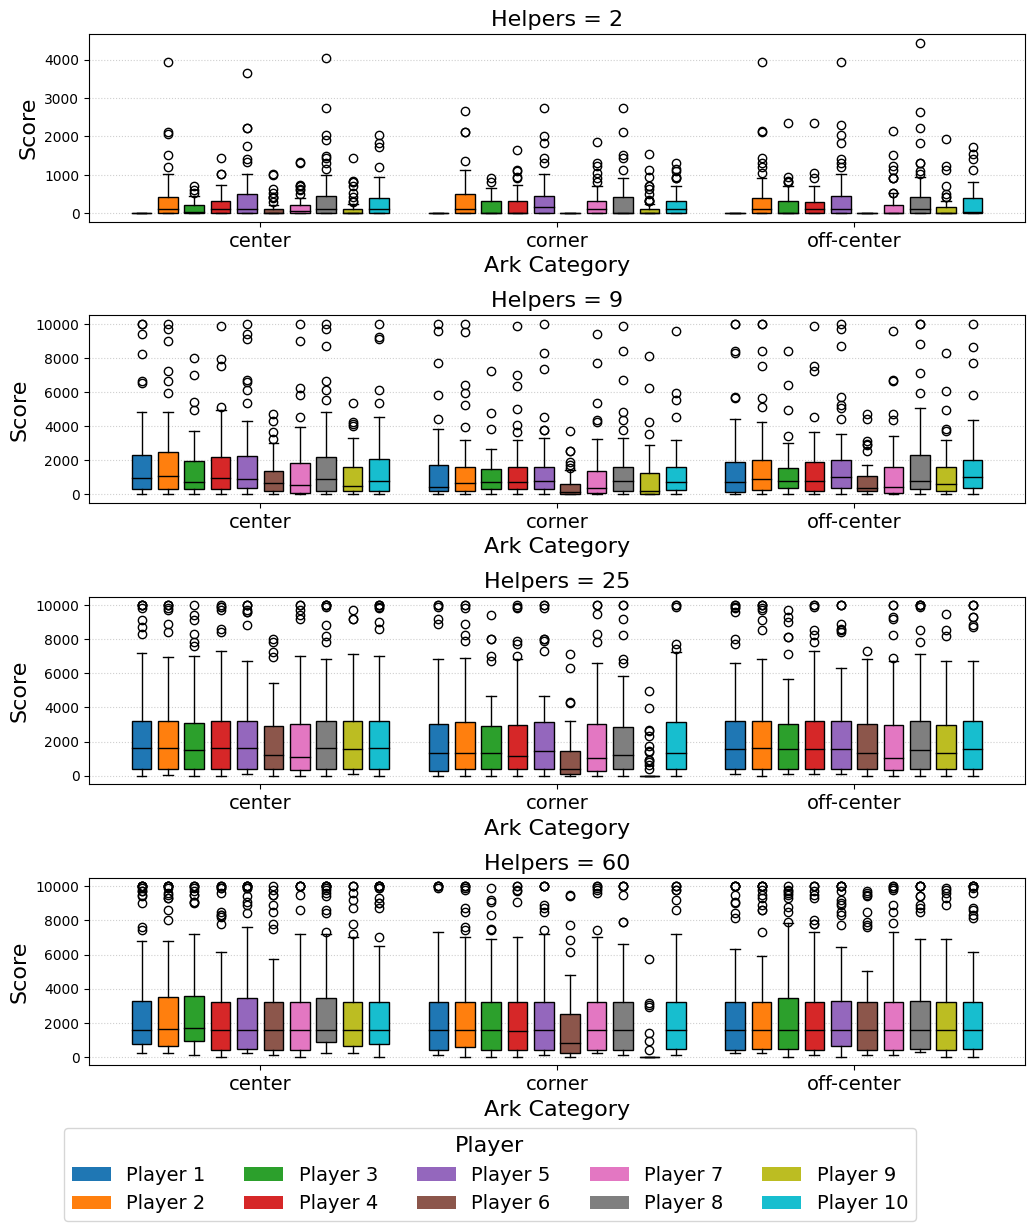

In [132]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.patches import Patch

# --- colors for players (as before) ---
colors = [cm.get_cmap('tab10')(i / 9) for i in range(10)] + \
         [cm.get_cmap('tab20')(1 / 19)]

df_plot = df.copy()

# Helpers groups (should be 4: [2, 9, 25, 60])
helpers_values = sorted(df_plot['helpers'].unique())

# Ark categories (3 string values)
ark_values = sorted(df_plot['ark_cat'].unique())   # ex: ["small", "medium", "large"]

n_players = 10

cluster_width = 0.8
box_width = cluster_width / (n_players * 1.05) - 0.01
offsets = np.linspace(-cluster_width/2, cluster_width/2, n_players)

# map ark_cat to positions 1,2,3
x_centers = np.arange(1, len(ark_values) + 1)

fig, axes = plt.subplots(len(helpers_values), 1, figsize=(11, 12), sharey=False)

for ax, h in zip(axes, helpers_values):

    sub_h = df_plot[df_plot['helpers'] == h]

    all_data = []
    positions = []

    for xi, ark in zip(x_centers, ark_values):
        sub_A = sub_h[sub_h['ark_cat'] == ark]

        # 10 players → 10 boxplots
        for p in range(1, n_players + 1):
            scores = sub_A[sub_A['player'] == p]['score'].values
            all_data.append(scores)
            positions.append(xi + offsets[p-1])

    bp = ax.boxplot(
        all_data,
        positions=positions,
        widths=box_width,
        patch_artist=True,
        medianprops=dict(color="black"),
        manage_ticks=False
    )

    # color boxes by player
    for i, patch in enumerate(bp['boxes']):
        player_index = i % n_players
        patch.set_facecolor(colors[player_index])

    for line in bp['whiskers']:
        line.set_color('black')
    for cap in bp['caps']:
        cap.set_color('black')

    ax.set_title(f"Helpers = {h}", fontsize=16)
    ax.set_xlabel("Ark Category", fontsize=16)
    ax.set_ylabel("Score", fontsize=16)

    ax.set_xticks(x_centers)
    ax.set_xticklabels(ark_values, fontsize=14)

    ax.yaxis.grid(True, linestyle=':', alpha=0.6)

# --- Legend: horizontal at bottom ---
legend_handles = [Patch(facecolor=colors[p], label=f"Player {p+1}") for p in range(n_players)]
fig.legend(
    handles=legend_handles,
    title="Player",
    loc="lower center",
    bbox_to_anchor=(0.5, -0.03),
    ncol=5,
    fontsize=14,
    title_fontsize=16
)

# Space for bottom legend
fig.tight_layout(rect=(0.05, 0.05, 1, 1))

plt.show()


['center', 'corner', 'off-center']


/var/folders/6f/jf84pgs92_g7qw0w6040htqc0000gn/T/ipykernel_43007/153248976.py:47: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  patch.set_facecolor(cm.get_cmap("tab10")(4/9))  # player 5 → index 4
/var/folders/6f/jf84pgs92_g7qw0w6040htqc0000gn/T/ipykernel_43007/153248976.py:47: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  patch.set_facecolor(cm.get_cmap("tab10")(4/9))  # player 5 → index 4
/var/folders/6f/jf84pgs92_g7qw0w6040htqc0000gn/T/ipykernel_43007/153248976.py:47: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplot

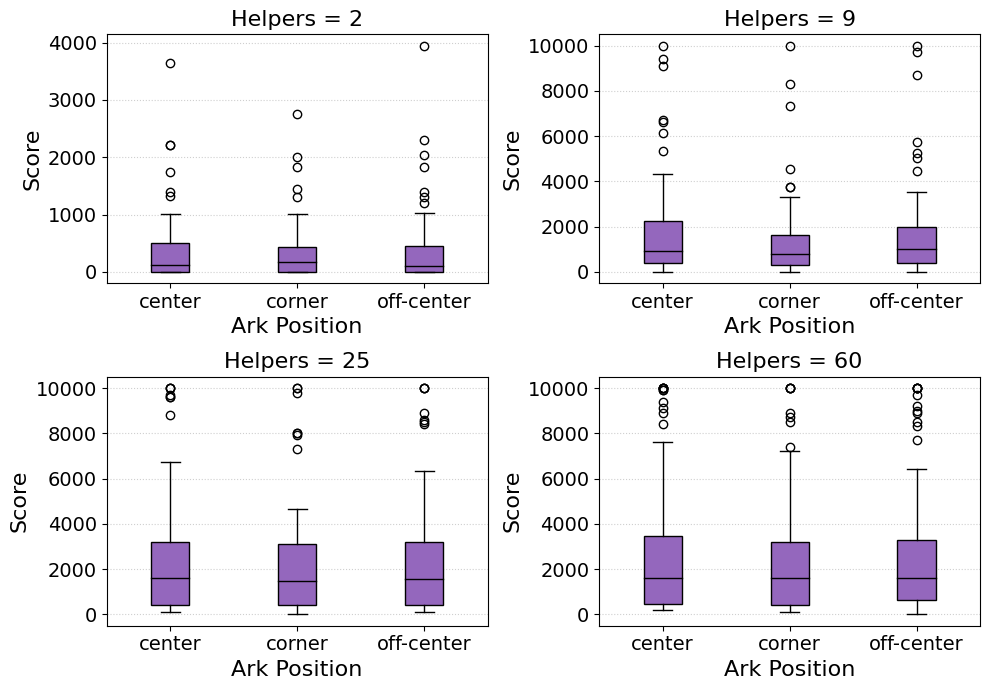

In [154]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm

df_plot = df.copy()

# Filter for player == 5 only
df_plot = df_plot[df_plot['player'] == 5]

# Helpers (4 subplots)
helpers_values = sorted(df_plot['helpers'].unique())

# Ark categories (3 string values)
ark_values = sorted(df_plot['ark_cat'].unique())
print(ark_values)

# Assign each ark_cat to X positions: 1, 2, 3
x_centers = np.arange(1, len(ark_values) + 1)

fig, axes = plt.subplots(2, 2, figsize=(10, 7), sharey=False)
axes = axes.flatten()

for ax, h in zip(axes, helpers_values):

    sub_h = df_plot[df_plot['helpers'] == h]

    all_data = []     # list of arrays for boxplot
    positions = []    # x positions

    for xi, ark in zip(x_centers, ark_values):
        scores = sub_h[sub_h['ark_cat'] == ark]['score'].values
        all_data.append(scores)
        positions.append(xi)

    # Single boxplot per tick
    bp = ax.boxplot(
        all_data,
        positions=positions,
        widths=0.3,
        patch_artist=True,
        medianprops=dict(color="black")
    )

    # Color boxes (choose one color for player 5)
    for patch in bp['boxes']:
        patch.set_facecolor(cm.get_cmap("tab10")(4/9))  # player 5 → index 4

    # Whisker & cap styling
    for line in bp['whiskers']:
        line.set_color("black")
    for cap in bp['caps']:
        cap.set_color("black")

    ax.set_title(f"Helpers = {h}", fontsize=16)
    ax.set_xlabel("Ark Position", fontsize=16)
    ax.set_ylabel("Score", fontsize=16)
    ax.tick_params(axis='y', labelsize=14)

    ax.set_xticks(x_centers)
    ax.set_xticklabels(ark_values, fontsize=14)

    ax.yaxis.grid(True, linestyle=":", alpha=0.6)

# Layout
fig.tight_layout()
plt.savefig('player5_score_by_ark_pos_and_helpers.pdf')
plt.show()


/var/folders/6f/jf84pgs92_g7qw0w6040htqc0000gn/T/ipykernel_43007/3055508432.py:45: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  patch.set_facecolor(cm.get_cmap("tab10")(4/9))
/var/folders/6f/jf84pgs92_g7qw0w6040htqc0000gn/T/ipykernel_43007/3055508432.py:45: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  patch.set_facecolor(cm.get_cmap("tab10")(4/9))
/var/folders/6f/jf84pgs92_g7qw0w6040htqc0000gn/T/ipykernel_43007/3055508432.py:45: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  

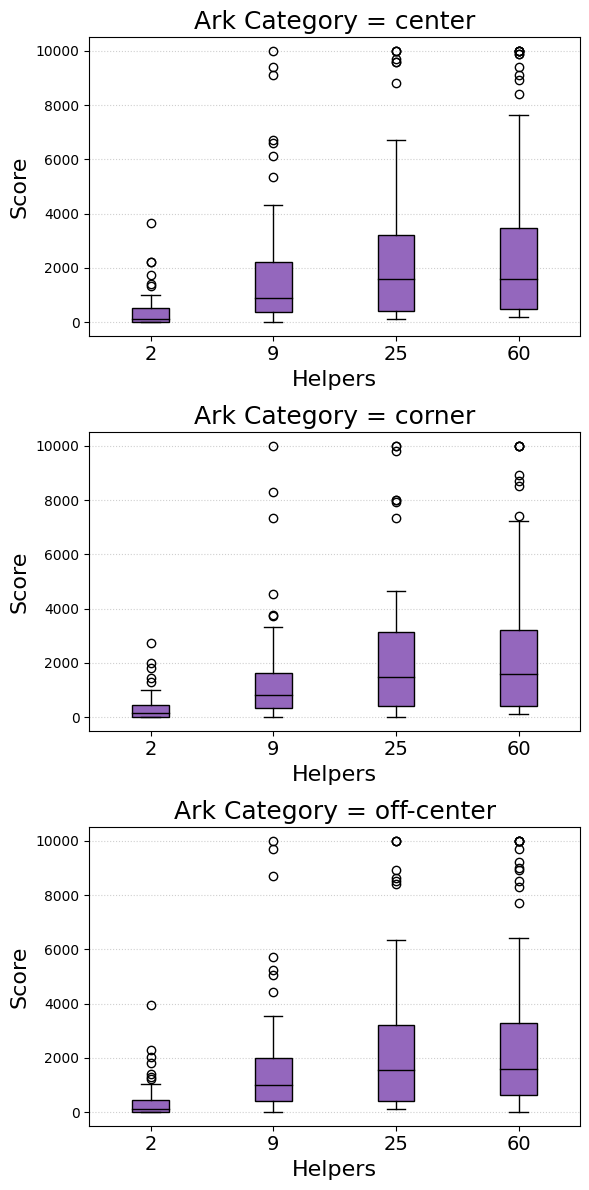

In [145]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm

df_plot = df.copy()

# Only player 5
df_plot = df_plot[df_plot['player'] == 5]

# Ark categories → now 4 subplots
ark_values = sorted(df_plot['ark_cat'].unique())

# Helpers on x-axis (4 values)
helpers_values = sorted(df_plot['helpers'].unique())

# Assign x positions 1..4
x_positions = np.arange(1, len(helpers_values) + 1)

fig, axes = plt.subplots(len(ark_values), 1, figsize=(6, 12), sharey=False)

for ax, ark in zip(axes, ark_values):

    sub_ark = df_plot[df_plot['ark_cat'] == ark]

    all_data = []
    positions = []

    for xi, h in zip(x_positions, helpers_values):
        scores = sub_ark[sub_ark['helpers'] == h]['score'].values
        all_data.append(scores)
        positions.append(xi)

    # Boxplot: one per helper value
    bp = ax.boxplot(
        all_data,
        positions=positions,
        widths=0.3,
        patch_artist=True,
        medianprops=dict(color="black")
    )

    # Color boxes (same color for player 5)
    for patch in bp['boxes']:
        patch.set_facecolor(cm.get_cmap("tab10")(4/9))

    # Style whiskers & caps
    for line in bp['whiskers']:
        line.set_color("black")
    for cap in bp['caps']:
        cap.set_color("black")

    # Labels & ticks
    ax.set_title(f"Ark Category = {ark}", fontsize=18)
    ax.set_xlabel("Helpers", fontsize=16)
    ax.set_ylabel("Score", fontsize=16)

    ax.set_xticks(x_positions)
    ax.set_xticklabels(helpers_values, fontsize=14)

    ax.yaxis.grid(True, linestyle=":", alpha=0.6)

fig.tight_layout()
plt.show()


## Boxplot by number of turns

Group by number of species or animal category?

/var/folders/6f/jf84pgs92_g7qw0w6040htqc0000gn/T/ipykernel_43007/3137442032.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = [cm.get_cmap('tab10')(i / 9) for i in range(10)] + \
/var/folders/6f/jf84pgs92_g7qw0w6040htqc0000gn/T/ipykernel_43007/3137442032.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  [cm.get_cmap('tab20')(1 / 19)]


T_values: [2016 4032 7056]


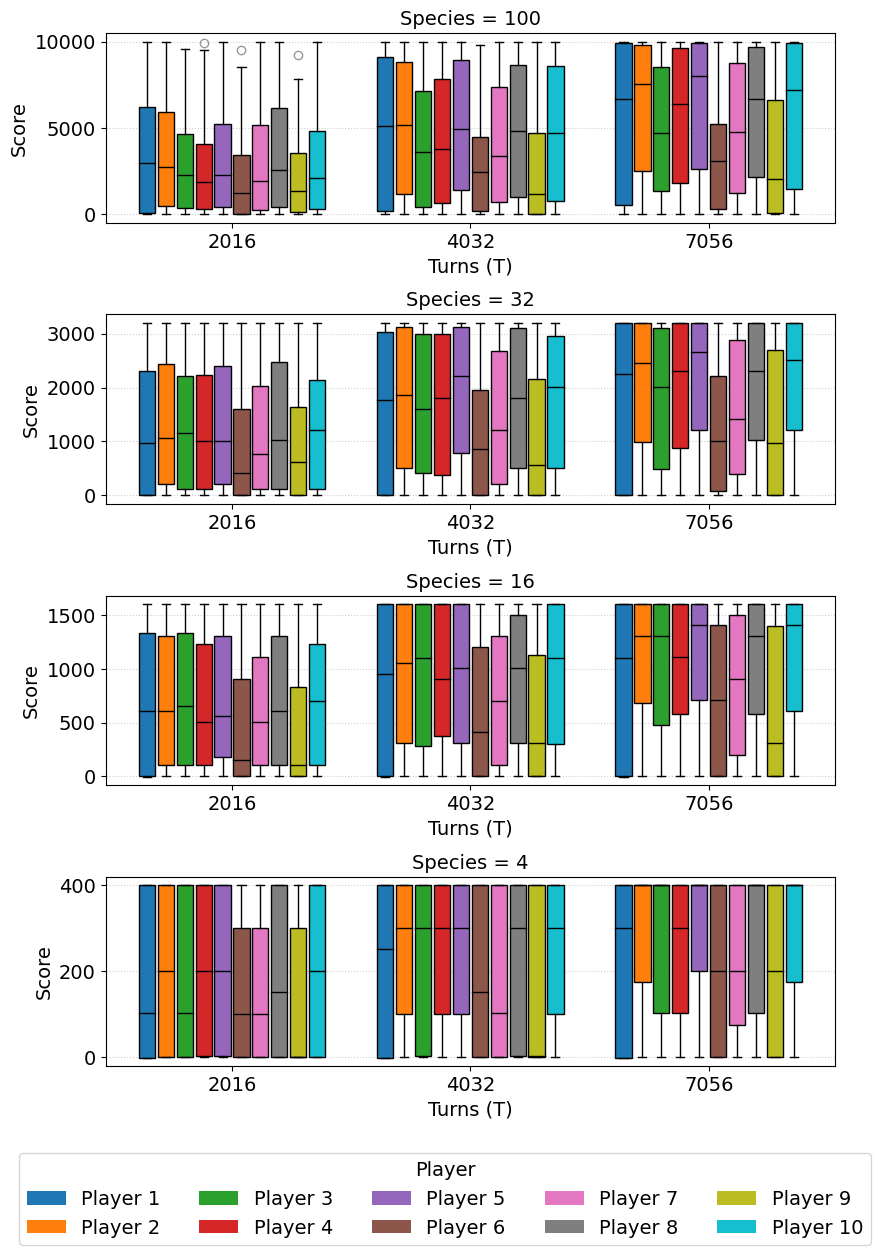

In [201]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.patches import Patch

# --- colors for players (as you provided) ---
colors = [cm.get_cmap('tab10')(i / 9) for i in range(10)] + \
         [cm.get_cmap('tab20')(1 / 19)]

# --- ensure we only use the relevant data (e.g. animals_cat == 'mixed' if needed) ---
# df_plot = df[df['animals_cat'] == 'mixed']
df_plot = df.copy()

# species (4 subplots)
species_values = sorted(df_plot['species'].unique(), reverse=True)  # should be 4 values

# T unique values (you said these are [2016, 4032, 7056])
T_values = np.array(sorted(df_plot['T'].unique()))
print("T_values:", T_values)

n_players = 10
cluster_width = 0.5          # total width of the cluster for each T (tweakable)
box_width = cluster_width / (n_players * 1.05)   # individual box width (slight gap)
offsets = np.linspace(-cluster_width/2, cluster_width/2, n_players)

# map large T values to small integer x positions 1,2,3
x_centers = np.linspace(1, len(T_values)*0.8, len(T_values))

fig, axes = plt.subplots(len(species_values), 1, figsize=(9, 12))

for ax, sp in zip(axes, species_values):
    sub_sp = df_plot[df_plot['species'] == sp]

    all_data = []
    positions = []

    for xi, t in zip(x_centers, T_values):
        sub_T = sub_sp[sub_sp['T'] == t]

        # for each player collect scores (may be empty arrays)
        for p in range(1, n_players + 1):
            scores = sub_T[sub_T['player'] == p]['score'].values
            all_data.append(scores)
            positions.append(xi + offsets[p-1])   # cluster around xi

    # Draw boxplots
    bp = ax.boxplot(
        all_data,
        positions=positions,
        widths=box_width,
        patch_artist=True,
        medianprops=dict(color="black"),
        manage_ticks=False  # we will set custom ticks below
    )

    # Color boxes by player (cycle every n_players)
    for i, patch in enumerate(bp['boxes']):
        player_index = i % n_players
        patch.set_facecolor(colors[player_index])

    # Optional: make whiskers/caps same color as median (or black)
    for line in bp['whiskers']:
        line.set_color('black')
    for cap in bp['caps']:
        cap.set_color('black')
    for flier in bp.get('fliers', []):
        flier.set(marker='o', alpha=0.4)

    ax.set_title(f"Species = {sp}", fontsize=14)
    ax.set_xlabel("Turns (T)", fontsize=14)
    ax.set_ylabel("Score", fontsize=14)

    # set x-ticks at the centers, labeled by original T values
    ax.set_xticks(x_centers)
    ax.set_xticklabels([str(int(t)) for t in T_values], fontsize=14)
    ax.tick_params(axis='y', labelsize=14)

    # make grid for easier reading
    ax.yaxis.grid(True, linestyle=':', alpha=0.6)

# Legend: one patch per player
# Legend: horizontal at bottom
legend_handles = [Patch(facecolor=colors[p], label=f"Player {p+1}") for p in range(n_players)]

fig.legend(
    handles=legend_handles,
    title="Player",
    loc="lower center",
    bbox_to_anchor=(0.55, -0.05),
    ncol=5,
    fontsize=14,
    title_fontsize=14
)

# Adjust layout to make room for bottom legend
fig.tight_layout(rect=(0.05, 0.05, 1, 1))
plt.savefig('players_scores_by_T_and_species.pdf', bbox_inches='tight')
plt.show()


/var/folders/6f/jf84pgs92_g7qw0w6040htqc0000gn/T/ipykernel_43007/4207467502.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = [cm.get_cmap('tab10')(i / 9) for i in range(10)] + [cm.get_cmap('tab20')(1 / 19)]


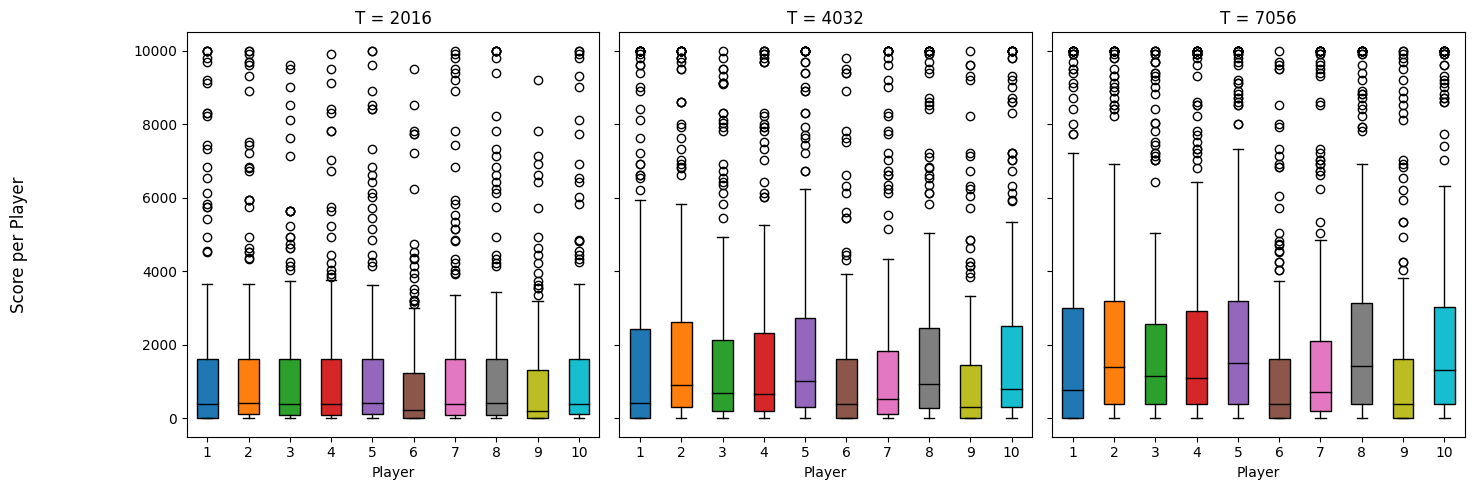

In [97]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm

# optional: filter animals_cat if you want
# df_plot = df[df['animals_cat'] == 'mixed']
df_plot = df  # or use a filter if needed

# get the unique T values you want to plot (assuming there are 3)
T_values = sorted(df_plot['T'].unique())

fig, axes = plt.subplots(1, len(T_values), figsize=(5 * len(T_values), 5), sharey=True)

# define colors
colors = [cm.get_cmap('tab10')(i / 9) for i in range(10)] + [cm.get_cmap('tab20')(1 / 19)]

for ax, t in zip(axes, T_values):
    sub = df_plot[df_plot['T'] == t]
    data = [sub[sub['player'] == p]['score'].values for p in range(1, 11)]

    bp = ax.boxplot(
        data,
        positions=range(1, 11),
        patch_artist=True,
        medianprops=dict(color="black")
    )

    for patch, color in zip(bp['boxes'], colors[:10]):
        patch.set_facecolor(color)

    ax.set_title(f"T = {t}")
    ax.set_xlabel("Player")
    ax.set_xticks(range(1, 11))

fig.supylabel("Score per Player")
fig.tight_layout(rect=(0.07, 0, 1, 1))
plt.show()


## 0 points analysis

In [206]:
df_0 = df[df['score'] == 0]

df_0['player'].value_counts()

player
9     156
6     138
2      24
4      23
7      23
10     16
8      15
3      14
5      12
1       4
Name: count, dtype: int64

In [212]:
df_0[df_0['player'] == 5]

,T,player,seed,map_path,run_path,score,sec,returncode,species,animals,helpers,ark,animals_cat,ark_cat
4,2016,5,10000,tournament/maps/species=4_animals=4x2_helpers=...,tournament/runs/T=2016#player=5#seed=10000#map...,0,4.465,0,4,4x2,2,500x500,unicorn,center
14,4032,5,10000,tournament/maps/species=4_animals=4x2_helpers=...,tournament/runs/T=4032#player=5#seed=10000#map...,0,5.580,0,4,4x2,2,500x500,unicorn,center
24,7056,5,10000,tournament/maps/species=4_animals=4x2_helpers=...,tournament/runs/T=7056#player=5#seed=10000#map...,0,7.185,0,4,4x2,2,500x500,unicorn,center
34,2016,5,10001,tournament/maps/species=4_animals=4x2_helpers=...,tournament/runs/T=2016#player=5#seed=10001#map...,0,4.485,0,4,4x2,2,100x400,unicorn,off-center
44,4032,5,10001,tournament/maps/species=4_animals=4x2_helpers=...,tournament/runs/T=4032#player=5#seed=10001#map...,0,5.609,0,4,4x2,2,100x400,unicorn,off-center
54,7056,5,10001,tournament/maps/species=4_animals=4x2_helpers=...,tournament/runs/T=7056#player=5#seed=10001#map...,0,7.187,0,4,4x2,2,100x400,unicorn,off-center
64,2016,5,10002,tournament/maps/species=4_animals=4x2_helpers=...,tournament/runs/T=2016#player=5#seed=10002#map...,0,4.486,0,4,4x2,2,990x990,unicorn,corner
74,4032,5,10002,tournament/maps/species=4_animals=4x2_helpers=...,tournament/runs/T=4032#player=5#seed=10002#map...,0,5.605,0,4,4x2,2,990x990,unicorn,corner
424,2016,5,10014,tournament/maps/species=4_animals=4x6_helpers=...,tournament/runs/T=2016#player=5#seed=10014#map...,0,4.554,0,4,4x6,2,990x990,unicorn,corner
1804,2016,5,10060,tournament/maps/species=16_animals=16x2_helper...,tournament/runs/T=2016#player=5#seed=10060#map...,0,4.552,0,16,16x2,2,500x500,rare,center


In [211]:
df_0['map_path'].value_counts()

map_path
tournament/maps/species=4_animals=4x2_helpers=2_ark=100x400.json       23
tournament/maps/species=4_animals=4x2_helpers=2_ark=500x500.json       20
tournament/maps/species=4_animals=4x2_helpers=2_ark=990x990.json       19
tournament/maps/species=4_animals=4x6_helpers=2_ark=990x990.json       13
tournament/maps/species=16_animals=16x2_helpers=2_ark=500x500.json     11
                                                                       ..
tournament/maps/species=32_animals=32x6_helpers=9_ark=990x990.json      1
tournament/maps/species=4_animals=4x20_helpers=9_ark=100x400.json       1
tournament/maps/species=32_animals=32x6_helpers=60_ark=100x400.json     1
tournament/maps/species=4_animals=4x20_helpers=25_ark=100x400.json      1
tournament/maps/species=16_animals=16x20_helpers=2_ark=500x500.json     1
Name: count, Length: 121, dtype: int64

/var/folders/6f/jf84pgs92_g7qw0w6040htqc0000gn/T/ipykernel_43007/2891327569.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_0['map_base'] = df_0['map_path'].apply(lambda x: os.path.basename(x)) # top 20
/var/folders/6f/jf84pgs92_g7qw0w6040htqc0000gn/T/ipykernel_43007/2891327569.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_0['map_label'] = df_0['map_base'].apply(parse_map_label)


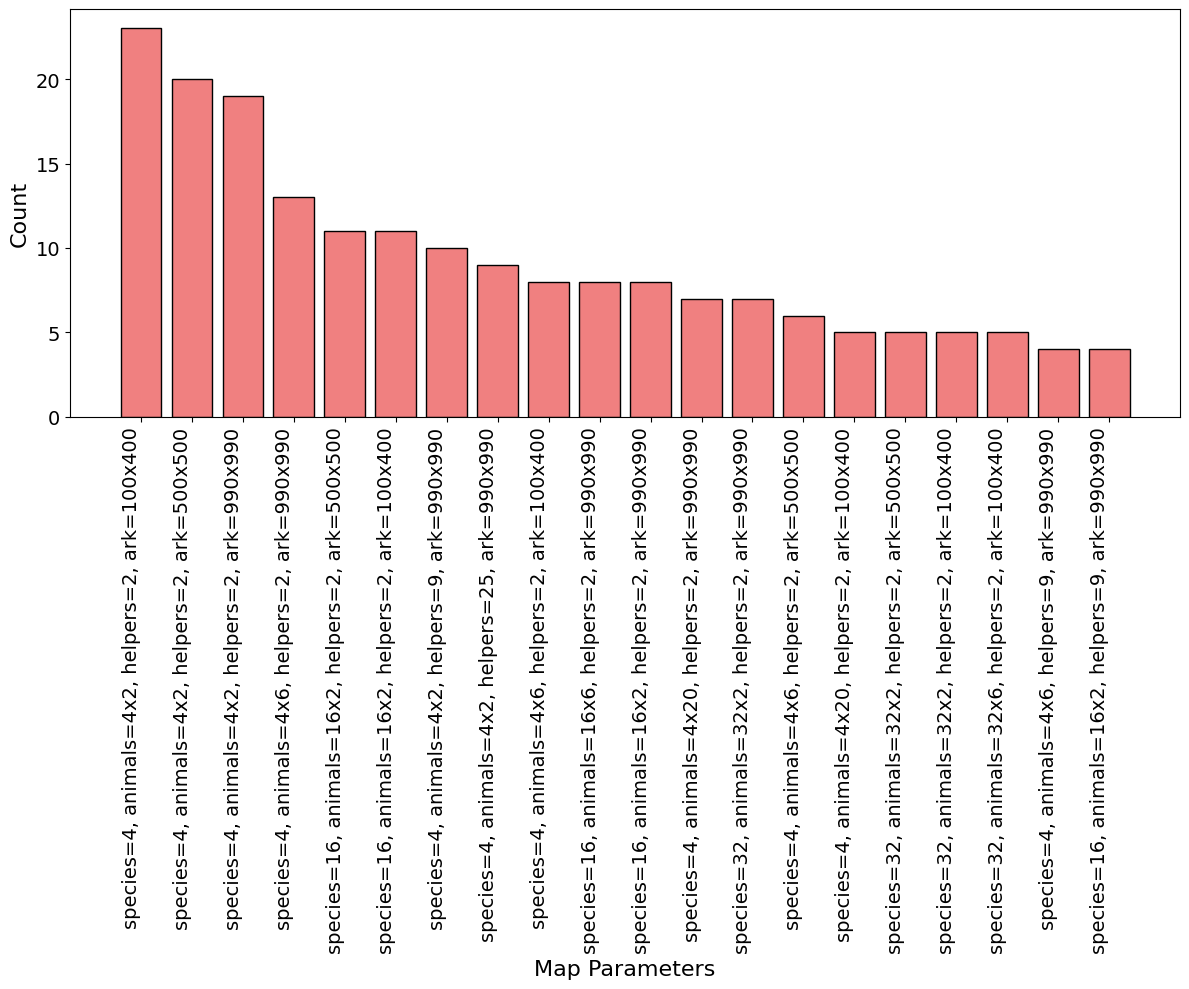

In [234]:
import matplotlib.pyplot as plt
import os

# Extract base filename
df_0['map_base'] = df_0['map_path'].apply(lambda x: os.path.basename(x)) # top 20

# Function to parse the filename into readable label
def parse_map_label(fname):
    # remove extension
    fname = fname.replace('.json','')
    # split by underscores
    parts = fname.split('_')
    # join parts with comma + space
    return ', '.join(parts)

df_0['map_label'] = df_0['map_base'].apply(parse_map_label)

# Count occurrences by map_label
counts = df_0['map_label'].value_counts().head(20)

# Barplot
plt.figure(figsize=(12,10))
plt.bar(counts.index, counts.values, color='lightcoral', edgecolor='black')
plt.xlabel('Map Parameters', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.xticks(rotation=90, ha='right')
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)
plt.tight_layout()
plt.savefig('zero_score_maps_top20.pdf', bbox_inches='tight')
plt.show()

/var/folders/6f/jf84pgs92_g7qw0w6040htqc0000gn/T/ipykernel_43007/3175682667.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_0['map_base'] = df_0['map_path'].apply(lambda x: os.path.basename(x))


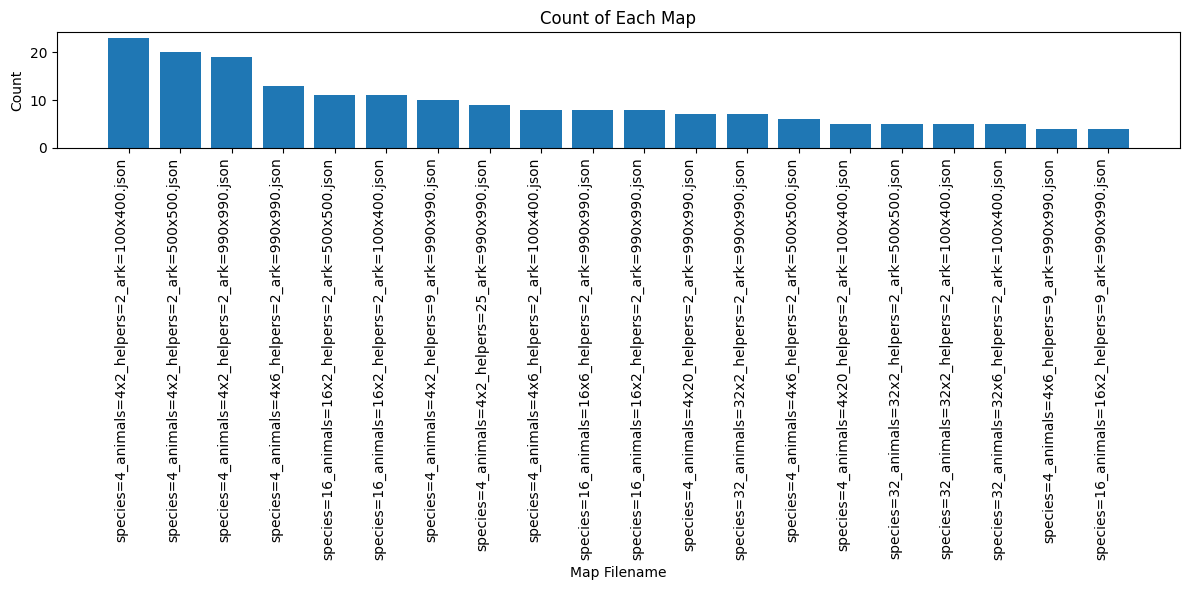

In [ ]:
import matplotlib.pyplot as plt
import os

# extract base filenames
df_0['map_base'] = df_0['map_path'].apply(lambda x: os.path.basename(x))

# count of each base map
counts = df_0['map_base'].value_counts()[:20]  # top 20

# barplot
plt.figure(figsize=(12,6))
plt.bar(counts.index, counts.values)
plt.xlabel('Map Filename')
plt.ylabel('Count')
plt.title('Count of Each Map')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
df_0.groupby(['map_path', 'T'])[['player']].count()

player
map_path                                           T    player        
tournament/maps/species=100_animals=100x100_hel... 4032 9            1
                                                   7056 9            1
tournament/maps/species=100_animals=100x100_hel... 2016 6            1
                                                   4032 6            1
                                                   7056 6            1
...                                                                ...
tournament/maps/species=4_animals=4x6_helpers=9... 2016 7            1
tournament/maps/species=4_animals=4x6_helpers=9... 2016 6            1
                                                        9            1
                                                   4032 9            1
                                                   7056 10           1

[425 rows x 1 columns]

## Our best configs analysis

In [237]:
df

,T,player,seed,map_path,run_path,score,sec,returncode,species,animals,helpers,ark,animals_cat,ark_cat
0,2016,1,10000,tournament/maps/species=4_animals=4x2_helpers=...,tournament/runs/T=2016#player=1#seed=10000#map...,-1,-1.000,1,4,4x2,2,500x500,unicorn,center
1,2016,2,10000,tournament/maps/species=4_animals=4x2_helpers=...,tournament/runs/T=2016#player=2#seed=10000#map...,0,4.398,0,4,4x2,2,500x500,unicorn,center
2,2016,3,10000,tournament/maps/species=4_animals=4x2_helpers=...,tournament/runs/T=2016#player=3#seed=10000#map...,0,4.390,0,4,4x2,2,500x500,unicorn,center
3,2016,4,10000,tournament/maps/species=4_animals=4x2_helpers=...,tournament/runs/T=2016#player=4#seed=10000#map...,0,4.364,0,4,4x2,2,500x500,unicorn,center
4,2016,5,10000,tournament/maps/species=4_animals=4x2_helpers=...,tournament/runs/T=2016#player=5#seed=10000#map...,0,4.465,0,4,4x2,2,500x500,unicorn,center
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7195,7056,6,40059,tournament/maps/species=100_animals=25x2_25x6_...,tournament/runs/T=7056#player=6#seed=40059#map...,4824,163.400,0,100,25x2_25x6_25x20_25x100,60,990x990,mixed,corner
7196,7056,7,40059,tournament/maps/species=100_animals=25x2_25x6_...,tournament/runs/T=7056#player=7#seed=40059#map...,6919,219.100,0,100,25x2_25x6_25x20_25x100,60,990x990,mixed,corner
7197,7056,8,40059,tournament/maps/species=100_animals=25x2_25x6_...,tournament/runs/T=7056#player=8#seed=40059#map...,7916,238.700,0,100,25x2_25x6_25x20_25x100,60,990x990,mixed,corner
7198,7056,9,40059,tournament/maps/species=100_animals=25x2_25x6_...,tournament/runs/T=7056#player=9#seed=40059#map...,0,161.700,0,100,25x2_25x6_25x20_25x100,60,990x990,mixed,corner


In [236]:
winners = (
        df.loc[df.groupby(['T', 'map_path'])['score'].idxmax()]['player']
        .value_counts()
        .sort_index()
    )
winners

player
1     222
2     106
3      90
4      44
5     120
6       5
7      10
8      60
9       2
10     61
Name: count, dtype: int64

/var/folders/6f/jf84pgs92_g7qw0w6040htqc0000gn/T/ipykernel_43007/2925106718.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = [cm.get_cmap('tab10')(i / 9) for i in range(10)]


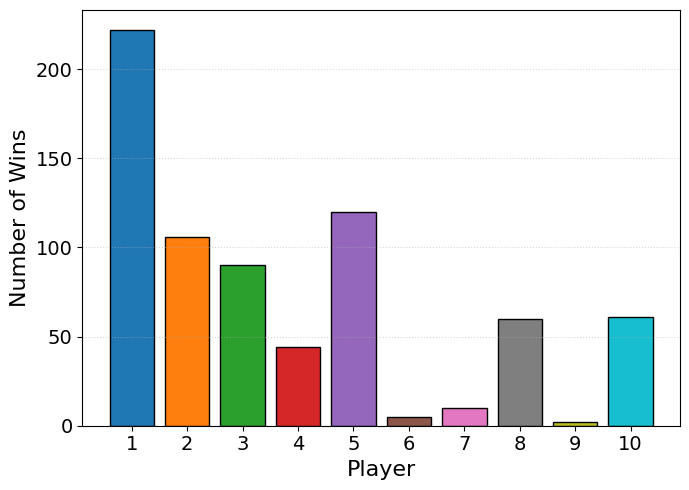

In [253]:
import matplotlib.pyplot as plt
from matplotlib import cm

# your winners series
winners = (
    df.loc[df.groupby(['T', 'map_path'])['score'].idxmax()]['player']
    .value_counts()
    .sort_index()
)

# colors for the 10 players
colors = [cm.get_cmap('tab10')(i / 9) for i in range(10)]

plt.figure(figsize=(7,5))
plt.bar(
    winners.index,
    winners.values,
    color=[colors[p-1] for p in winners.index],  # player colors
    edgecolor='black',   # rim

)

plt.xlabel("Player", fontsize=16)
plt.ylabel("Number of Wins", fontsize=16)
plt.xticks(winners.index)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)
plt.grid(axis='y', linestyle=':', alpha=0.5)

plt.tight_layout()
plt.savefig('overall_wins_by_player.pdf', bbox_inches='tight')
plt.show()


In [242]:
df.groupby(['T', 'map_path'])[['score']].idxmax()

score
T    map_path                                                 
2016 tournament/maps/species=100_animals=100x100_hel...   6697
     tournament/maps/species=100_animals=100x100_hel...   6660
     tournament/maps/species=100_animals=100x100_hel...   6720
     tournament/maps/species=100_animals=100x100_hel...   6517
     tournament/maps/species=100_animals=100x100_hel...   6487
...                                                        ...
7056 tournament/maps/species=4_animals=4x6_helpers=6...    650
     tournament/maps/species=4_animals=4x6_helpers=6...    710
     tournament/maps/species=4_animals=4x6_helpers=9...    501
     tournament/maps/species=4_animals=4x6_helpers=9...    472
     tournament/maps/species=4_animals=4x6_helpers=9...    531

[720 rows x 1 columns]

In [256]:
# Step 1: index of best score per (T, map_path)
winners_idx = df.groupby(['T', 'map_path'])['score'].idxmax()

# Step 2: winners subset
winners_df = df.loc[winners_idx]

# Step 3: filter for player 5
player5_wins = winners_df[winners_df['player'] == 5]

# Step 4: keep T, map_path, score
player5_win_df = player5_wins[['T', 'map_path', 'score']].reset_index(drop=True)

player5_win_df.sort_values(by=['score'], ascending=False, inplace=True)
player5_win_df.to_csv('player5_wins.csv', index=False)

In [257]:
player5_win_df

,T,map_path,score
31,4032,tournament/maps/species=100_animals=100x20_hel...,10000
82,7056,tournament/maps/species=100_animals=25x2_25x6_...,9901
74,7056,tournament/maps/species=100_animals=100x6_help...,9604
37,4032,tournament/maps/species=100_animals=100x6_help...,9010
79,7056,tournament/maps/species=100_animals=25x2_25x6_...,8809
...,...,...,...
89,7056,tournament/maps/species=16_animals=16x2_helper...,5
3,2016,tournament/maps/species=100_animals=100x2_help...,5
48,4032,tournament/maps/species=16_animals=16x2_helper...,2
25,2016,tournament/maps/species=4_animals=4x20_helpers...,2
